# Entscheidungsbäume

Zuerst werden ein paar Zufallsdaten eingelesen, hier aus einer .csv - Datei.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "BisherigeEinstellungen.csv"
df = pd.read_csv(input_file, header = 0, sep = ";")

In [3]:
df.head()

,Jahre Erfahrung,Aktuell angestellt?,Anzahl bisherige Arbeitgeber,Abschluss,Elite-Uni,Hat Praktikum gemacht?,Hat Job bekommen?
0,10,J,4,BS,N,N,J
1,0,N,0,BS,J,J,J
2,7,N,6,BS,N,N,N
3,2,J,1,MS,J,N,J
4,20,N,2,PhD,J,N,N


Damit scikit-learn mit diesen Daten arbeiten kann, müssen alle Werte numerisch sein. Also verwenden wir eine "1" anstelle einem Ja, und eine "0" anstelle einem Nein. Zudem müssen die Abschlüsse in numerische Werte umgewandelt werden.

Bei echten Daten, müsste man sich überlegen: Was macht man, wenn Daten fehlen oder in einem offensichtlich ungültigen Bereich liegen? Wir verwenden hier die .map() - Methode, ungültige Werde bekommen den Wert NaN. 

In [4]:
d = {'J': 1, 'N': 0}
df['Hat Job bekommen?'] = df['Hat Job bekommen?'].map(d)
df['Aktuell angestellt?'] = df['Aktuell angestellt?'].map(d)
df['Elite-Uni'] = df['Elite-Uni'].map(d)
df['Hat Praktikum gemacht?'] = df['Hat Praktikum gemacht?'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Abschluss'] = df['Abschluss'].map(d)
df.head()

,Jahre Erfahrung,Aktuell angestellt?,Anzahl bisherige Arbeitgeber,Abschluss,Elite-Uni,Hat Praktikum gemacht?,Hat Job bekommen?
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Als nächstes werden die Eigenschaften von der Information ob ein Bewerber den Job bekommen hat oder nicht abgetrennt. Damit enthält die Variable *features* nur noch die Eigenschaften, aus denen das Ergebnis ob die Person eingestellt werden soll berechnet wird.

In [5]:
features = list(df.columns[:6])
features

['Jahre Erfahrung',
 'Aktuell angestellt?',
 'Anzahl bisherige Arbeitgeber',
 'Abschluss',
 'Elite-Uni',
 'Hat Praktikum gemacht?']

Jetzt wird der Entscheidungsbaum aufgestellt:

In [6]:
y = df["Hat Job bekommen?"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

... und angezeigt. Aber Achtung: Auf deinem Computer muss hierfür Graphviz und pydotplus installiert sein.

Wie interpretiert man jetzt diesen Entscheidungsbaum?

Bei jeder Verzweigung geht man nach links für ein "wahr" und nach rechts für ein "falsch". Am Ende bekommt man dann das Ergebnis, wie viele Personen eingestellt wurden bzw. nicht eingestellt wurden. [0, 5] bedeutet also, dass es 0 Personen gab, die nicht eingestellt wurden und 5 Personen, die eingstellt wurden. 

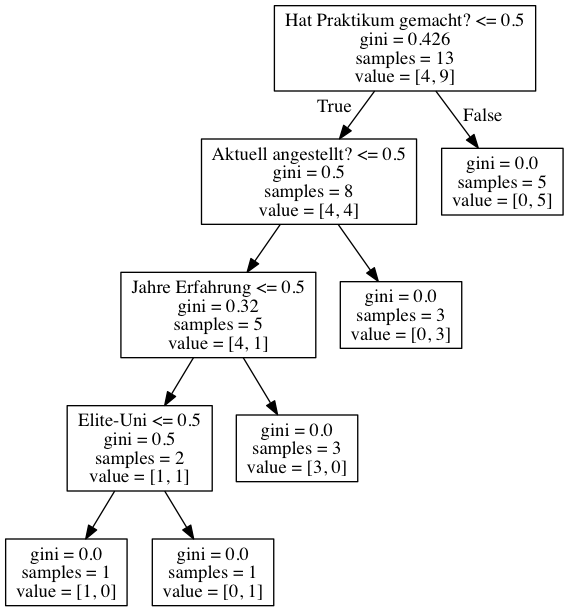

In [7]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

## Ensemble learning: Random forest

Mit einem Random Forest kann man mehrere Entscheidungsbäumen darüber abstimmen lassen, ob ein Kandidat eingestellt werden soll oder nicht:

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

# Jemand hat 10 Jahre Job-Erfahrung, und aktuell einen Job. 
# Wird er bei uns anfangen?
print(clf.predict([[10, 1, 4, 0, 0, 0]]))

# Jemand hat 10 Jahre Job-Erfahrung, und aktuell keinen Job. 
# Wird er bei uns anfangen?
print(clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


## Aufgabe

Passe die Testdaten an und spiele mit den verschiedenen Eigenschaften rum. Was passiert, wenn in der Tabelle verschiedene Leute sehr viel mehr Leute eingestellt werden? Verändert sich die Form des Entscheidungsbaumes?